In [4]:
import sys
sys.path.insert(1, '../src/')

import json, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gemini_wrapper as gemini
import rag
import time

In [5]:
pd.options.display.max_colwidth = 150

In [6]:
valid, passed, located = 93, 58, 24

Text(0.5, 1.0, 'Generated Test Analysis')

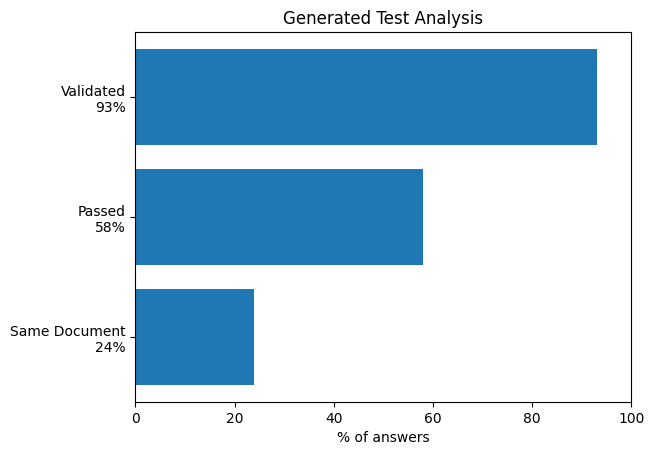

In [7]:
y = [valid, passed, located]
y_pos = np.arange(len(y))
ls = [f'Validated\n{valid}%', f'Passed\n{passed}%', f'Same Document\n{located}%']
_, ax = plt.subplots()
ax.barh(y_pos, y)
ax.set_yticks(y_pos, labels=ls)
ax.invert_yaxis() 
ax.set_xlim([0, 100])
ax.set_xlabel('% of answers')
ax.set_title('Generated Test Analysis')

In [8]:
mtx = json.loads(open('../metadata/metrics.json').read())

def process_result(q, ans, met):
    loc_match = ans['doc'] == q['doc']
    return q['question'], q['answer'], ans['answer'], ans['valid'], loc_match, met

arr = [process_result(q, ans, met) for q, ans, met in mtx]
df = pd.DataFrame(arr, columns=['question', 'answer', 'rag answer', 'valid', 'loc_match', 'similarity'])
df.similarity = df.similarity.round(1)

In [9]:
df[(df.similarity > .9)].head()

,question,answer,rag answer,valid,loc_match,similarity
3,What company is specified to supply the bedhead services containment system?,Cableflow International Limited,Cableflow International Limited,True,True,1.0
8,What is the required written notice period for testing and inspections to be given to the CA?,10 working days.,10 working days,True,True,1.0
10,"According to the provided text, what regulation mandates the ring bonding conductor for buildings with IT equipment?",Regulation 444 of the IET Wiring Regulations.,Regulation 444 of the IET Wiring Regulations.,True,True,1.0
12,What is the purpose of the BIM Kick-off meeting and BEP development meeting?,To define the scope of BIM for the project with Design/Project Team stakeholders. A draft BEP is to be issued ahead of the meeting.,To define the scope of BIM for the project with Design/Project Team stakeholders. A draft BEP is to be issued ahead of the meeting.,True,False,1.0
13,Which standards are referenced for earthing and bonding installation in the building?,"HTM's, HBN's, BS 7671, and BS 7430.","HTMs, HBNs, BS 7671, and BS 7430.",True,False,1.0


In [10]:
df[(df.similarity > .7) & (df.similarity <= .99)].head()

,question,answer,rag answer,valid,loc_match,similarity
0,What equipment is included in Level 2 Vacuum Plantroom 13.018 (64.2.083)?,"A packaged medical vacuum plant, a local final circuit distribution board, and a Windcatcher controller for the Second Floor & Atrium.","Packaged medical vacuum plant, local final circuit distribution board, and windcatcher controller for Second Floor & Atrium.",True,True,0.9
4,What specific aspects of existing installations are surveyed in steps 7 and 8?,"Step 7 surveys for adequacy, safety, condition, maintainability, and hazardous substances/materials. Step 8 surveys to determine function, size, m...","Step 7 surveys existing installations for adequacy, safety, condition, maintainability, and hazardous substances/materials. Step 8 surveys existin...",True,True,0.8
7,What pressure range is required for the Pressure Safety Valves to reach maximum flow capacity and reseat?,The valve shall have a minimum lift pressure of 510kPa and be capable of reaching maximum flow capacity at 580kPa. It shall reseat after opening a...,The Pressure Safety Valves must have a minimum lift pressure of 510kPa and be capable of reaching maximum flow capacity at 580kPa. Reseating occu...,False,True,0.8
18,What is the nominal voltage and voltage range of the SM24A-SR actuator?,The nominal voltage is AC/DC 24 V. The nominal voltage range is AC 19.2...28.8 V / DC 19.2...28.8 V.,"The nominal voltage is AC/DC 24 V, and the voltage range is AC 19.2...28.8 V / DC 19.2...28.8 V.",True,False,0.9
22,What is the accuracy of the analog voltage output?,+/-100mV,+/-100 mV,True,False,0.9


In [38]:
df[df.similarity < .5].sort_values(['similarity']).head()

,question,answer,rag answer,valid,loc_match,similarity
20,What information is displayed on the 'Service View' screens of the SER8350 Room Controller?,"The 'Service View' screens show the current status of various points, including room temperature, changeover temperature sensor reading, supply ai...","The service view screens display the current status of certain points locally on the Room Controller, and these points can also be viewed through ...",True,False,0.0
16,"How many meters are listed for the Plantroom MCC2, DB19 L&P, Chiller 1, Chiller 2, and PV combined?",6,1 + 2 + 1 + 1 + 1 = 5 meters,True,False,0.0
81,How many temperature sensors are listed for monitoring plantroom space temperature?,"Four (13.018, 13.017 No.1, 13.017 No.2, 13.019 No.1, 13.019 No.2)",6,True,False,0.0
54,What is the document number of the EcoStruxure Panel Server User Guide?,DOCA0172EN-04,Not enough context provided.,False,False,0.0
78,What is the revision number of the drawing referenced in the provided text?,5,Z01,True,False,0.0


In [1]:
txt = "SHEET: 8 of 38\nAssociated Technology Services LtdUnit 4 Westfield Court, Barns Ground, Clevedon, BS21 6FQTel: 01275 879485        e-Mail: enquiries@atscontrols.co.ukQMF43 Rev3 02.11.20MCC.1 LEVEL 1 HEATING & HOT WATER PLANT ROOMP05254-MCC.1RUH DYSON CANCER CENTREREV: 5DRAWING No:\n24v0vL1N 24vL1N0v010 010\nNL1\n03\nNL1MCB1112A003 MCB1231ASET TO 25 DEG C\nPOWERSECTION\nNL0v10v10v POWERSUPPLY\n821822\n823CNONCTEMP 09000126127+-SLP SENSORGROUND FLOOR SPACEBACNET/MSTP SENSORS 31NOSLP SENSORS:FOR DETAILS AND LOCATIONS PLEASEREFER TO PROJECT POINTS LIST XXXXAND LAYOUT DRAWINGS XXXX\n08000128129+-VAV/CAVGROUND FLOORVAV (4NO) / CAV (47NO)CAV/VAV UNITS:FOR DETAILS AND LOCATIONS PLEASEREFER TO PROJECT POINTS LIST XXXXAND LAYOUT DRAWINGS XXXX\n+-SLP SENSOR+-SLP SENSOR+-+- VAV/CAVVAV/CAV"
print(txt)

SHEET: 8 of 38
Associated Technology Services LtdUnit 4 Westfield Court, Barns Ground, Clevedon, BS21 6FQTel: 01275 879485        e-Mail: enquiries@atscontrols.co.ukQMF43 Rev3 02.11.20MCC.1 LEVEL 1 HEATING & HOT WATER PLANT ROOMP05254-MCC.1RUH DYSON CANCER CENTREREV: 5DRAWING No:
24v0vL1N 24vL1N0v010 010
NL1
03
NL1MCB1112A003 MCB1231ASET TO 25 DEG C
POWERSECTION
NL0v10v10v POWERSUPPLY
821822
823CNONCTEMP 09000126127+-SLP SENSORGROUND FLOOR SPACEBACNET/MSTP SENSORS 31NOSLP SENSORS:FOR DETAILS AND LOCATIONS PLEASEREFER TO PROJECT POINTS LIST XXXXAND LAYOUT DRAWINGS XXXX
08000128129+-VAV/CAVGROUND FLOORVAV (4NO) / CAV (47NO)CAV/VAV UNITS:FOR DETAILS AND LOCATIONS PLEASEREFER TO PROJECT POINTS LIST XXXXAND LAYOUT DRAWINGS XXXX
+-SLP SENSOR+-SLP SENSOR+-+- VAV/CAVVAV/CAV
